# Tensorflow tutorial Valleau Lab
Evan Komp
01.21

> This notebook introduces the user to tensorflow syntax with examples through Keras. It starts with a very basic dense neural network and the Keras classes within, giving an example of model creation, training, and prediction. It then introduces some hyperparmeters and hyperparameter optimization through a high level model building function. It then transitions into object oriented structure to utilize the functional API, reproducing the previous example and then exemplifying a more complex architectures outside of basic sequentials.

## Table of Contents

<span style="color:orange">__Part 1a__</span>:

- Basic Keras objects
- Function to create a Dense NN
- Using our model on the diabetes data, training and predicting

    
<span style="color:orange">__Part 1b__</span>:

- Additional Keras objects and parameters eg. hyperparameter specification
- Simple grid optimization of a single hyperparameter

<span style="color:orange">__Part 2__</span>:

- Keras functional API and class definitions
- Example of a much more complex model


In [1]:
## imports
#. multiprocessing
import joblib

#. numbers
import numpy as np
import pandas as pd

#. tensorflow libraries
import tensorflow.keras as ks

#. data tools 
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer

#. visualization
import matplotlib.pyplot as plt

!python --version

Python 3.6.10 :: Anaconda, Inc.


### Part 1a: Basic keras
Objects for a basic neural network and an example of their use
***

<span style="color:red">Some keras classes</span>

>__The sequential class__: This class defines a model whose flow travels sequentially from inputs to outputs. It is perfect to quickly create a simple dense neural network.

In [2]:
help(ks.Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.com

Important Methods:
- add(layer); adds a keras layer \<layer> to the model
- compile(loss_function); inititiate the model with loss surface according to \<loss_function>
- summary(); Describe the model over all
- fit(x, y); train (fit the parameters) to passed features \<x> and labels \<y>
- predict(x); make predictions of the label based on passed features \<x>

>__Dense Layers__: A fully connecteed hidden layer

In [3]:
help(ks.layers.Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(16,)))
 |  # now the model will take as input arrays of shape (*, 16)
 |  # and output arrays of shape (*, 32)
 |  
 |  # after the first layer, you don't need to specify
 |  # the size 

Important arguments:
- units, integer; number of neurons for the layer

<span style="color:red">The creation of an incredibly simple neural network</span>

It will be three hidden layers, with 3, then 4, then 5 neurons, folllowed by an output layer.

In [4]:
def build_basic_dnn():
    """Create a simple dense neural network with 3 hidden layers of 3, 4, 5 neurons
    and an output layer.
    
    Returns:
        model (ks.model): 
            the defined keras model
    """
    ## initialize the model
    #. do not pass it a list of layers, instead add layers as per the example
    model = ks.Sequential()
    
    ## Add the three hidden layers of 3, 4, 5 neurons each
    model.add(
        ks.layers.Dense(3, activation='tanh') # Remember the tanh activation function?
    )
    
    model.add(
        ks.layers.Dense(4, activation='tanh')
    )
    
    model.add(
        ks.layers.Dense(5, activation='tanh')
    )
    
    ## add the output layer
    #. it is just 1 neuron
    model.add(ks.layers.Dense(1))
    
    ## compile the model
    #. using MSE as the loss function
    model.compile(loss = 'MSE')
    
    ## return the compiled model
    return model

<span style="color:red">Training our model</span>

Use the (small) diabetes dataset to train our model.

In [5]:
## first get the data
X, y = load_diabetes(return_X_y=True)
## and describe it
print('The types of the X, y data are: {}, {}'.format(type(X), type(y)))
print('Their shapes are: {}, {}'.format(X.shape, y.shape))

The types of the X, y data are: <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
Their shapes are: (442, 10), (442,)


So we have 442 examples, each of 10 feature values and a single target label. We need to split it into testing and training sets (yes even for simple demonstrations!)

In [6]:
## split 20% of the data away for testing (randomly)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [7]:
## Now create the model using our function
model = build_basic_dnn()

In [8]:
## and train the model with the fit method
#. specify 100 epochs, or 100 iterations
#. Increase verbosity so that we can observe everything that happens
#. store the history of training
history = model.fit(X_train, y_train, epochs = 100, verbose = 2)

Train on 353 samples
Epoch 1/100
353/353 - 1s - loss: 29181.8141
Epoch 2/100
353/353 - 0s - loss: 29153.1067
Epoch 3/100
353/353 - 0s - loss: 29123.5256
Epoch 4/100
353/353 - 0s - loss: 29093.9598
Epoch 5/100
353/353 - 0s - loss: 29059.4658
Epoch 6/100
353/353 - 0s - loss: 29023.4445
Epoch 7/100
353/353 - 0s - loss: 28984.2603
Epoch 8/100
353/353 - 0s - loss: 28940.0479
Epoch 9/100
353/353 - 0s - loss: 28895.2060
Epoch 10/100
353/353 - 0s - loss: 28848.5971
Epoch 11/100
353/353 - 0s - loss: 28797.6381
Epoch 12/100
353/353 - 0s - loss: 28746.2875
Epoch 13/100
353/353 - 0s - loss: 28694.8821
Epoch 14/100
353/353 - 0s - loss: 28642.0395
Epoch 15/100
353/353 - 0s - loss: 28588.3869
Epoch 16/100
353/353 - 0s - loss: 28536.8586
Epoch 17/100
353/353 - 0s - loss: 28485.8184
Epoch 18/100
353/353 - 0s - loss: 28437.9697
Epoch 19/100
353/353 - 0s - loss: 28388.5269
Epoch 20/100
353/353 - 0s - loss: 28340.6667
Epoch 21/100
353/353 - 0s - loss: 28296.2525
Epoch 22/100
353/353 - 0s - loss: 28252.094

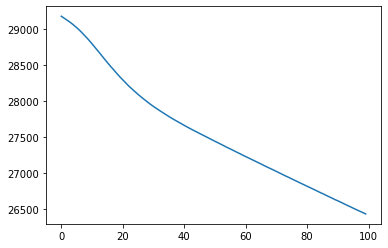

In [9]:
## let's vizualize the training
loss = history.history['loss']
plt.plot(loss)

The loss is going down! The (for the most part) indicates that it is getting better and better! We might also want to show how the model is predicting on data it has never seen before. Do this by passing the X and y data we want to evaluate on to the training function

In [10]:
## repeat the above with validation data passed
model = build_basic_dnn()
history = model.fit(X_train, y_train, epochs = 100, verbose = 2,
                   validation_data = (X_test, y_test))

Train on 353 samples, validate on 89 samples
Epoch 1/100
353/353 - 1s - loss: 29169.5383 - val_loss: 28538.0544
Epoch 2/100
353/353 - 0s - loss: 29121.2854 - val_loss: 28492.4350
Epoch 3/100
353/353 - 0s - loss: 29075.9645 - val_loss: 28447.8642
Epoch 4/100
353/353 - 0s - loss: 29029.4691 - val_loss: 28398.1389
Epoch 5/100
353/353 - 0s - loss: 28978.6572 - val_loss: 28345.1133
Epoch 6/100
353/353 - 0s - loss: 28925.5080 - val_loss: 28293.1430
Epoch 7/100
353/353 - 0s - loss: 28871.6216 - val_loss: 28239.6405
Epoch 8/100
353/353 - 0s - loss: 28816.1526 - val_loss: 28177.6401
Epoch 9/100
353/353 - 0s - loss: 28755.7624 - val_loss: 28123.2334
Epoch 10/100
353/353 - 0s - loss: 28699.3665 - val_loss: 28065.8095
Epoch 11/100
353/353 - 0s - loss: 28640.7338 - val_loss: 28007.0642
Epoch 12/100
353/353 - 0s - loss: 28581.7551 - val_loss: 27947.1942
Epoch 13/100
353/353 - 0s - loss: 28521.9227 - val_loss: 27881.8509
Epoch 14/100
353/353 - 0s - loss: 28458.9673 - val_loss: 27824.1492
Epoch 15/100

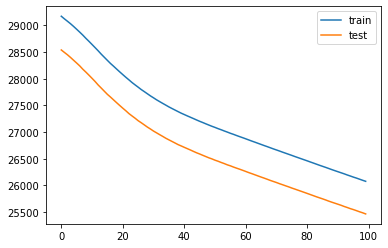

In [11]:
## plot both losses on the training data, and the evalutation data
train_loss, test_loss = history.history.values()

plt.plot(train_loss, label = 'train')
plt.plot(test_loss, label = 'test')
plt.legend()

Both the training and testing loss are going down. This means that our model is not overfitting, in which case it would start to get worse and worse and predicting the testing data. Let's make some predictions

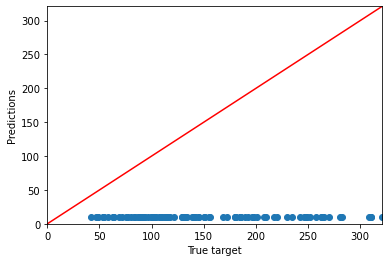

In [12]:
## make predictions with the model
y_pred = model.predict(X_test)

## plot the comparison
plt.scatter(y_test, y_pred)
plt.xlabel('True target')
plt.ylabel('Predictions')
plt.xlim(0, y_test.max())
plt.ylim(0, y_test.max())

## and plot the perfect model line
plt.plot([0, y_test.max()], [0, y_test.max()], c='r')

__It is absolutely terrible!__ Let's figure out why

### Part 1b: Hyperparameter specifics
Some additional objects for hyperparameters and optimization, and a demonstration.
***

<span style="color:red">New functions and objects</span>

Some for preprocessing, some for our model architecture, some for regularization, some for learning.

>__scikit learn normalization/scaling__: tool for transforming data

In [13]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like standard normally
 |  distributed data (e.g. Gaussian with 0 mean and 

In [14]:
help(Normalizer)

Help on class Normalizer in module sklearn.preprocessing._data:

class Normalizer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Normalize samples individually to unit norm.
 |  
 |  Each sample (i.e. each row of the data matrix) with at least one
 |  non zero component is rescaled independently of other samples so
 |  that its norm (l1, l2 or inf) equals one.
 |  
 |  This transformer is able to work both with dense numpy arrays and
 |  scipy.sparse matrix (use CSR format if you want to avoid the burden of
 |  a copy / conversion).
 |  
 |  Scaling inputs to unit norms is a common operation for text
 |  classification or clustering for instance. For instance the dot
 |  product of two l2-normalized TF-IDF vectors is the cosine similarity
 |  of the vectors and is the base similarity metric for the Vector
 |  Space Model commonly used by the Information Retrieval community.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_normalization>`.
 |  
 |  Parameters
 |

Important methods:
- fit(X); define the transformations parameters from data \<X>, with rows as examples and columns as features
- transform(X); transform passed data \<X> based on previously fitted parameters
- get_params(); return the fitted parameters

>__Additional Dense arguments__: specifying hyperparameters to the ks.Dense layer

- activation(type); define the activation function for neurons in this layer based on string \<type> such as 'relu', 'tanh'
- kernel_initializer(type); string \<type> of initialization to randomly initialize weights in the neurons
- kernel_regularizer(type); string \<type> of regularizer to use on weights in this layer eg. 'l2' or a user defined regularizer, see type ks.regularizers

> __Optimizers objects__: defining your optimizer for loss descent

In [15]:
help(ks.optimizers.SGD)

Help on class SGD in module tensorflow.python.keras.optimizer_v2.gradient_descent:

class SGD(tensorflow.python.keras.optimizer_v2.optimizer_v2.OptimizerV2)
 |  Stochastic gradient descent and momentum optimizer.
 |  
 |  Computes:
 |  ```
 |  theta(t+1) = theta(t) - learning_rate * gradient
 |  gradient is evaluated at theta(t).
 |  ```
 |  
 |  or Computes (if `nesterov = False`):
 |  ```
 |  v(t+1) = momentum * v(t) - learning_rate * gradient
 |  theta(t+1) = theta(t) + v(t+1)
 |  if `nesterov` is False, gradient is evaluated at theta(t).
 |  if `nesterov` is True, gradient is evaluated at theta(t) + momentum * v(t),
 |    and the variables always store theta + m v instead of theta
 |  ```
 |  
 |  Some of the args below are hyperparameters, where a hyperparameter is
 |  defined as a scalar Tensor, a regular Python value, or a callable (which
 |  will be evaluated when `apply_gradients` is called) returning a scalar
 |  Tensor or a Python value.
 |  
 |  @compatibility(eager)
 |  Wh

Important arguments are dependant on the optimizer, though usually have learning rate (lr) as an argument. Optimizer hyperparameters are very finnicky and tend to have "best starting points"

<span style="color:red">More complex model building function</span>

Let's create a model with some of these complex hyperparameters being specifiable.

In [16]:
def build_dnn(neurons=(3, 4, 5),
              loss='MSE',
              activation='relu',
              do_rate=.2,
              l2=.01,
              lr=.001,
              beta_1=.9,
              beta_2=.999
              ):
    """Create Dense Neural network with dropout, and l2 capabilites using the 
    Adam optimizer.
    
    Args:
        neurons - neuron counts in hidden layers. Dense NN will have len(neurons) hidden layers
            type == tuple of int
            d (3, 4, 5)
            
        loss - loss function to use. a default keras loss OR you can define your own
            type == str or ks.losses class
            
        activation - activation function to use in hidden layers
            type == str
            d 'relu'
            
        do_rate - dropout rate to use on hidden layers
            type == float
            d .2
            
        l2 - l2 regularization rate to use on hidden layer weights
            type == float
            d 0.01
            
        lr - Adam learning rate to use
            type == float
            d .001
            
        beta_1 - Adam first momentum parameter
            type == float
            d = .9
            
        beta_2 - Adam second momentum parameter
            type == float
            d = .999
            
    Returns:
        model - keras sequential model, built and compiled
            type == ks.engine.sequential.Sequential
    """
    ## prepare the optimizer
    opt = ks.optimizers.Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2)
    
    ## prepare the regularizer for hidden layers with specified l2 rate
    reg = ks.regularizers.l2(l2)
    
    ## initialize the model object
    model = ks.Sequential()
    
    ## build each of the hidden layers
    for neuron_count in neurons:
        
        #. add the dense layer
        model.add(
            ks.layers.Dense(
                neuron_count, # specified number of neurons
                kernel_regularizer = reg,
                activation = activation #specified activation. Note you can define your own like I did regularizers
                )
        )
        
        #. add the dropout layer with the specified dropout rate
        model.add(ks.layers.Dropout(do_rate))
        
        
    ## after hidden layers, build output layer - default linear activation
    model.add(ks.layers.Dense(1))
    
    ## compile it
    model.compile(
        optimizer = opt, # with our optimizer
        loss = loss # and specified loss function. Note you can creat your own loss function instead of using one of the defaults
    )
   
    return model

<span style="color:red">Using this on the data</span>

In this case initialize it with defaults except no dropout (in favor of l2) and with only 2 very large layers. Also choose our training hyperparameters.

In [17]:
## first we need to standardize the data
#. create the object
norm = Normalizer()
scale = StandardScaler()

#. fit it to our training data
norm.fit(X_train)
scale.fit(y_train.reshape(-1,1))

#. transform our data
X_train_normed = norm.transform(X_train)
X_test_normed = norm.transform(X_test)

y_train_scaled = scale.transform(y_train.reshape(-1,1))
y_test_scaled = scale.transform(y_test.reshape(-1,1))

In [18]:
## create and train model
model = build_dnn(neurons = (60,60),
                  do_rate = 0.0)


history = model.fit(X_train_normed, y_train_scaled, 
                   epochs = 300, batch_size = 32, verbose = 2,
                   validation_data = (X_test_normed, y_test_scaled))

Train on 353 samples, validate on 89 samples
Epoch 1/300
353/353 - 1s - loss: 1.6216 - val_loss: 1.4043
Epoch 2/300
353/353 - 0s - loss: 1.4213 - val_loss: 1.2453
Epoch 3/300
353/353 - 0s - loss: 1.2714 - val_loss: 1.1265
Epoch 4/300
353/353 - 0s - loss: 1.1708 - val_loss: 1.0414
Epoch 5/300
353/353 - 0s - loss: 1.1008 - val_loss: 0.9784
Epoch 6/300
353/353 - 0s - loss: 1.0455 - val_loss: 0.9205
Epoch 7/300
353/353 - 0s - loss: 1.0064 - val_loss: 0.8875
Epoch 8/300
353/353 - 0s - loss: 0.9670 - val_loss: 0.8527
Epoch 9/300
353/353 - 0s - loss: 0.9328 - val_loss: 0.8289
Epoch 10/300
353/353 - 0s - loss: 0.9092 - val_loss: 0.8052
Epoch 11/300
353/353 - 0s - loss: 0.8821 - val_loss: 0.7795
Epoch 12/300
353/353 - 0s - loss: 0.8655 - val_loss: 0.7643
Epoch 13/300
353/353 - 0s - loss: 0.8492 - val_loss: 0.7420
Epoch 14/300
353/353 - 0s - loss: 0.8205 - val_loss: 0.7204
Epoch 15/300
353/353 - 0s - loss: 0.8045 - val_loss: 0.7100
Epoch 16/300
353/353 - 0s - loss: 0.7845 - val_loss: 0.6977
Epoc

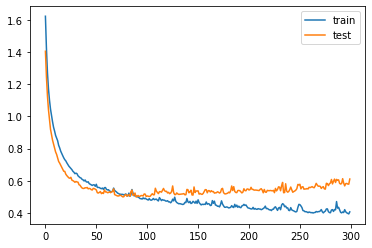

In [19]:
## plot both losses on the training data, and the evalutation data
train_loss, test_loss = history.history.values()

plt.plot(train_loss, label = 'train')
plt.plot(test_loss, label = 'test')
plt.legend()

This loss looks more encourageing! It seems to be reaching a sort of minimum, though it might be beneficial to stop at ~ 150 epochs because it looks like it may be overfitting.

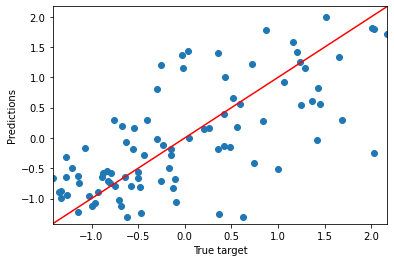

In [20]:
## make predictions with the model
y_pred = model.predict(X_test_normed)

## get the plot min and max
miny, maxy = y_test_scaled.min(), y_test_scaled.max()

## plot the comparison
plt.scatter(y_test_scaled, y_pred)
plt.xlabel('True target')
plt.ylabel('Predictions')
plt.xlim(miny, maxy)
plt.ylim(miny, maxy)

## and plot the perfect model line
plt.plot([miny, maxy], [miny, maxy], c='r')

The model is basically just guessing the mean. That is not ideal but it is way better than the last case, at least it can learn the mean! Overfitting is probably a result of it overfitting __to the training mean__ while the testing mean is a but different. The behavior that we see here happens where either:
- our model is not complex enough to learn the data intricacies
- there is not enough data

400 datapoints is VERY low (for a neural network) so the second is probably the case

Finally, let's just look at our model

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              multiple                  660       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_9 (Dense)              multiple                  3660      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  61        
Total params: 4,381
Trainable params: 4,381
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_8',
    'trainable': True,
    'dtype': 'float32',
    'units': 60,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L1L2',
     'config': {'l1': 0.0, 'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.0,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_9',
    'trainable': True,
    'dtype': 'float32',
    'units': 60,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'conf

<span style="color:red">Simple grid optimization</span>

For purposes of demonstration, let's grid search over number of neurons in the first hidden layer. When optimizing hyperparameters, it is important we __do not contaminate the testing data__. Remember, we want to hold out the testing data to evaluate our final product, but we also don't wan't to evaluate just the training loss because this will not show us overfitting. Instead we will specify some of the training data for validation. Doing a grid search sequentially will be __very slow__ so we will quickly parallelize the grid.

In [23]:
## first create a wrapper function to return the metric that we care about
#. that would be the loss ON SOME VALIDATION DATA
def dnn_point_evaluation(no_neurons, train_data):
    '''
    Build, train, and evaluate (validation) a DNN for the number of neurons in the first
    hidden layer as a grid point.
    
    Arguments:
        no_neurons - number of neurons in the first hidden layer
            type == int
            
        train_data - tuple of training x, training y
            type == tuple
    '''
    
    ## create the model that we want, no dropout rate and specified first HL count
    model = build_dnn(neurons = (no_neurons, 5, 5),
                      do_rate = 0.0)
    
    ## train the model on the training data, evaluating on validation
    history = model.fit(train_data[0], train_data[1], 
                   epochs = 100, batch_size = 32, verbose = 2,
                   validation_split = 0.2) # this time we specify 20% of the training data for val
    
    ## get the metric that we care about, the final validation loss
    val_loss = history.history['val_loss'][-1]
    
    return val_loss

In [24]:
## define our grid of points
neurons_grid = range(1, 97, 5)
print('First HL neurons to be tested: ', list(neurons_grid))

First HL neurons to be tested:  [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]


### <span style="color:green">THE ABOVE FUNCTION, and the function build_dnn have both been added exactly as is to utils.py file, in order to allow us to run in parallel</span>

In [25]:
import utils as ut

In [26]:
## run in parallel on all available cores
val_losses = joblib.Parallel(n_jobs=-1)(joblib.delayed(ut.dnn_point_evaluation)
                           (n, (X_train_normed, y_train_scaled)) for n in neurons_grid)

Text(0, 0.5, 'Loss (MSE, scaled)')

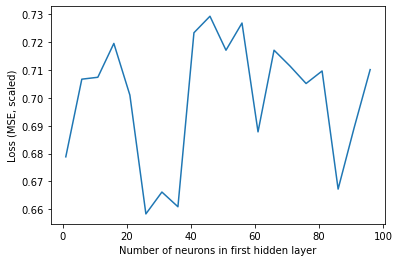

In [27]:
## plot the validation losses against the number of neurons in that model
plt.plot(neurons_grid, val_losses)
plt.xlabel('Number of neurons in first hidden layer')
plt.ylabel('Loss (MSE, scaled)')

The error seems relatively independant of the first hidden layer neurons. The best seems to be around 20 neurons. This is likely because the model is too complex for the data size.

### Part 2: Functional API and more complex models
Showcasing the "proper" way to create keras models by explicitly flowing the tensors. showcase the general format of creating a model class, then reproduce a simple DNN, then a more complex model.
***

<span style="color:red">General Formula</span>

We have the object initialization call upon methods that build individual portions or "units." This seems to have no advantage for a single unit mode, but becomes more important when we need to intertwine different tensors.

In [28]:
class ExplicitModel:
    '''
    The basic formula for defining explicity your own model class. It runs methods to
    create tensor connections, then compiles it.
    '''
    
    def __init__(self, input_shape, **kwargs):
        
        ## construct the different units of the model
        self.unit = self.build_unit(input_shape, **kwargs)
        
        ## combine all of the units
        self.model = self.unit
        
        ## define our optimizer
        self.optimizer = ks.optimizers()
        
        ## compile the model
        self.model.compile(self.optimizer, **kwargs)
        
        return
        
        
    def build_unit(self, input_shape, **kwargs):
        
        ## define our input
        xin = ks.layers.Input(shape = input_shape, **kwargs)
        
        ## buld the rest of the model
        #. maybe a dense layer with 3 neurons
        x = ks.layers.Dense(units=3, **kwargs)(xin)

        #. maybe a dropout layer
        x = ks.layers.Dropout(0.2, **kwargs)(x)
        
        #. a convolutional layer
        x = ks.layers.Conv1D(32, 2, **kwargs)(x)
        
        #. a layer norm
        x = ks.layers.LayerNormalization(**kwargs)(x)
        
        #. an output
        xout = ks.layers.Dense(1, **kwargs)(x)
        
        ## wrap the unit
        unit = ks.Model(xin, xout, name = 'unit')
        
        return unit
    

<span style="color:red">A simple dnn</span>

In [29]:
class DNN:
    
    def __init__(self, input_shape, loss = 'MSE',  **kwargs):
        
        ## construct the model and optimizer
        self.model, self.optimizer = self.build_DNN(input_shape = input_shape, **kwargs)
        
        ## compile the model
        self.model.compile(self.optimizer, loss = loss)
        
        return
    
    def build_DNN(self, input_shape, 
                  neurons = (3, 4, 5),
                  activation = 'relu',
                  do_rate = .2,
                  l2 = .01,
                  lr = .001,
                  beta_1 = .9,
                  beta_2 = .999,
                  **kwargs):
        
        ## prepare the optimizer
        optimizer = ks.optimizers.Adam(learning_rate = lr, 
                                         beta_1 = beta_1, 
                                         beta_2 = beta_2)

        ## prepare the regularizer for hidden layers with specified l2 rate
        reg = ks.regularizers.l2(l2)
        
        ## construct the mode
        #. !!!!!!!!!!!! Using keras functional API!
        
        #. input layer
        xin = ks.Input(shape = input_shape)
        #. flatten layer (safe for 2D+ inputs)
        x = ks.layers.Flatten()(xin)
        
        #. iterate through hidden layers
        for n in neurons:
            
            # add a dense layer
            x = ks.layers.Dense(n, 
                                kernel_regularizer = reg,
                                activation = activation
                               )(x)
            
            # add dropout layer
            x = ks.layers.Dropout(do_rate)(x)
            
        #. add the output layer
        xout = ks.layers.Dense(1)(x)
        
        #. wrap the model
        model = ks.Model(inputs = xin, outputs = xout)

        return model, optimizer

We can interface with this pretty much the same way as we did previously! We just have to make sure we pass the correct shape.

In [30]:
## create and train model
dnn = DNN(X_train_normed.shape[1:], 
        neurons = (60,60,60),
        do_rate = 0.0)


history = dnn.model.fit(X_train_normed, y_train_scaled, 
                   epochs = 300, batch_size = 32, verbose = 2,
                   validation_data = (X_test_normed, y_test_scaled))

Train on 353 samples, validate on 89 samples
Epoch 1/300
353/353 - 1s - loss: 2.2368 - val_loss: 1.9840
Epoch 2/300
353/353 - 0s - loss: 1.9498 - val_loss: 1.7394
Epoch 3/300
353/353 - 0s - loss: 1.7319 - val_loss: 1.5472
Epoch 4/300
353/353 - 0s - loss: 1.5848 - val_loss: 1.4171
Epoch 5/300
353/353 - 0s - loss: 1.4778 - val_loss: 1.3205
Epoch 6/300
353/353 - 0s - loss: 1.3734 - val_loss: 1.2239
Epoch 7/300
353/353 - 0s - loss: 1.2928 - val_loss: 1.1530
Epoch 8/300
353/353 - 0s - loss: 1.2201 - val_loss: 1.0872
Epoch 9/300
353/353 - 0s - loss: 1.1530 - val_loss: 1.0291
Epoch 10/300
353/353 - 0s - loss: 1.0971 - val_loss: 0.9928
Epoch 11/300
353/353 - 0s - loss: 1.0490 - val_loss: 0.9462
Epoch 12/300
353/353 - 0s - loss: 1.0210 - val_loss: 0.9065
Epoch 13/300
353/353 - 0s - loss: 0.9791 - val_loss: 0.8916
Epoch 14/300
353/353 - 0s - loss: 0.9474 - val_loss: 0.8707
Epoch 15/300
353/353 - 0s - loss: 0.9201 - val_loss: 0.8403
Epoch 16/300
353/353 - 0s - loss: 0.9087 - val_loss: 0.8158
Epoc

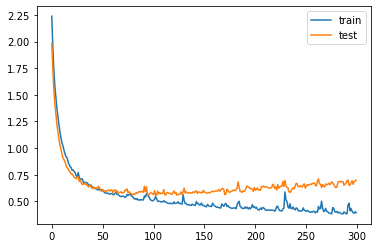

In [31]:
## plot both losses on the training data, and the evalutation data
train_loss, test_loss = history.history.values()

plt.plot(train_loss, label = 'train')
plt.plot(test_loss, label = 'test')
plt.legend()

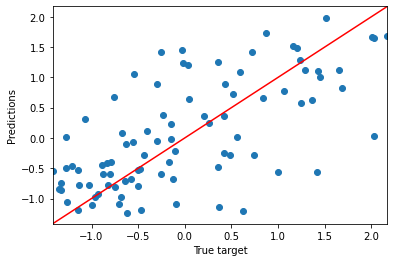

In [32]:
## make predictions with the model
y_pred = dnn.model.predict(X_test_normed)

## get the plot min and max
miny, maxy = y_test_scaled.min(), y_test_scaled.max()

## plot the comparison
plt.scatter(y_test_scaled, y_pred)
plt.xlabel('True target')
plt.ylabel('Predictions')
plt.xlim(miny, maxy)
plt.ylim(miny, maxy)

## and plot the perfect model line
plt.plot([miny, maxy], [miny, maxy], c='r')

Let's look at our model and see that it looks just like our standard DNN

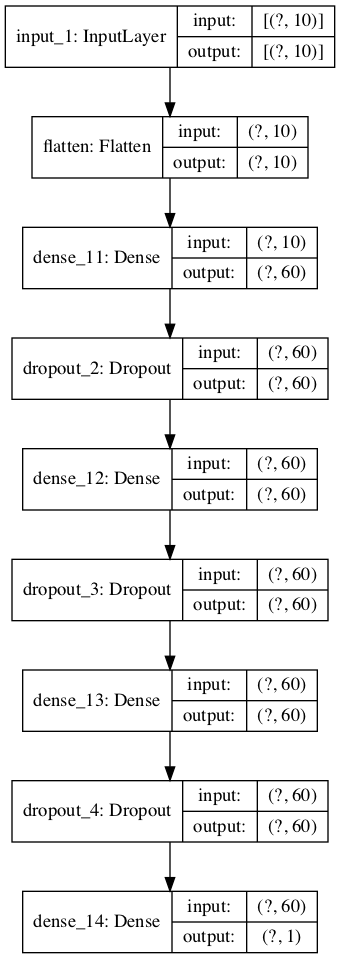

In [33]:
ks.utils.plot_model(dnn.model, show_shapes = True)

<span style="color:red">A more complex model</span>

__Completely making up a problem__:

Let's say we want to be able to predict some molecular property based on some other molecular features as well as a known "class" of molecule. You have a dataset of m examples, with N molecular features (<code>feats</code>), the geometry (<code>geom</code>), the molecular class (<code>class</code>), and the target molecular feature (<code>label</code>). The dataset looks like so:

| ......feats (,N)......     | geom (,?) | class (,1) | label (,1) |
| -------------------- | --------- | ---------- | ---------- |
| $f_{1,1}, ... , f_{1,N}$ | $g_1$ | $c_1$ | $l_1$ |
| ... | ... | ... | ... |
| $f_{m,1}, ... , f_{m,N}$ | $g_m$ | $c_m$ | $l_m$ |

You want a robust model to predict your label from just a few other features and the molecualr class, like so:

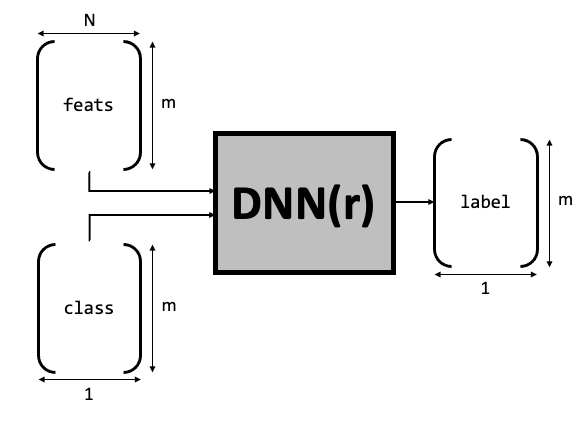

__BUT__ you know that <span style="color:blue">in the future you may have geometry instead of classes in __some__ cases</span>. It might be a poor choice to train a seperate classifier to predict class from geometry and then feed that prediction into the above model, because the classifier would not then have the context of your label predicting model. Instead, you might want to create a composite model that can classify the molecule to feed to the DNN, but trained with the context of the final label. That model might look like the following, where we use geometry and the molecular features to feed a convolutional classifier:

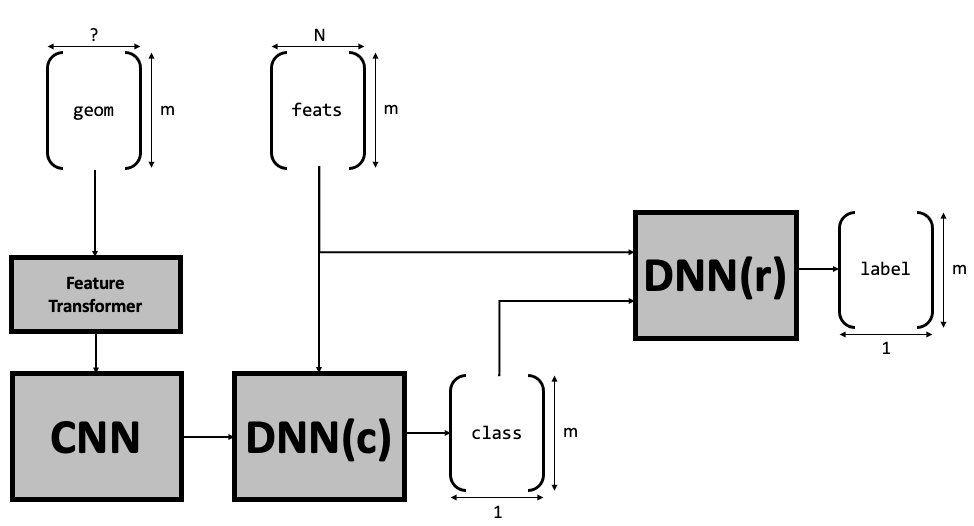

In this case, the label regressor can be trained on our dataset to predict the label based on class and molecular features. This model can be used in the future to make those predictions on new data. We will also train the "backend" of the above model on our dataset with geometry being transformed by a chosen feature transformation, then convolved, then combined with the molecular features that we have to classify the molecule. We will however train this __on the loss of the label__ and not the class, ensuring that the backend will allow us to make label predictions in the future for examples where we have geometry instead of a label. Let's build it!

In [34]:
class CompositeMolecularModel:
    
    
    ## init will access submethods to build our individual units and combine them
    def __init__(self, feats_shape, class_shape, 
                 featurizer = None, 
                 regressor_kwargs = None, 
                 classifier_kwargs = None,
                 convolver_kwargs = None,
                 **kwargs):
        
        #. first store the shapes
        self.feats_shape = feats_shape
        self.class_shape = class_shape
        
        
    
    ## building the regressor
    #. this is the DNN that will predict label from class and feats
    def build_regressor(self, neurons = (20,20,20), l2 = 0.1, activation = 'relu',
                        **kwargs):
        
        # Define our regularizer
        reg = ks.regularizers.l2(l2)
        
        # Define the two input layers and concatenate them
        c_in = ks.Input(shape = self.class_shape)
        c = ks.layers.Flatten()(c_in)
        
        f_in = ks.Input(shape = self.feats_shape)
        f = ks.layers.Flatten()(f_in)
        
        l = ks.layers.concatenate([c, f])
        
        
        # Now build the DNN with l2 regularizers
        for n in neurons:
            
            l = ks.layers.Dense(n, 
                                activation = activation,
                                kernel_regularizer = reg,
                                **kwargs)(l)
            
        # Finally build the output layer
        out = ks.layers.Dense(1)(l)
        
        # wrap the tensors and return
        dnnr = ks.Model([c_in, f_in], out)
        
        return dnnr
        
    ## build the classifier DNN - this one does not take a data input but is fed by CNN
    def build_classifier(self, input_tensor, 
                         neurons = (20,20,20), 
                         l2 = 0.1, 
                         activation = 'relu',
                         **kwargs):
        
        # Define our regularizer
        reg = ks.regularizers.l2(l2)
        
        # The input to this DNN is just the output from the CNN, and it will be passed
        l = input_tensor
        
        # Now build the DNN with l2 regularizers
        # we will also add batch normalization - this will help the classifier learn
        # in the context of the label faster
        for n in neurons:
            
            # Dense layer - the hard work
            l = ks.layers.Dense(n, 
                                activation = activation,
                                kernel_regularizer = reg,
                                **kwargs)(l)
            
            # Batch norm layer to speed things up
            l = ks.layers.BatchNormalization()
            
        
        # output layer - this is a classifier so we want a sigmoid activation
        # it has the shape of the class count
        out = ks.layers.Dense(self.cshape, activation = 'sigmoid')
        
        # wrap the model and return
        dnnc = ks.Model(classifier_in, out)
        
        return dnnc
    
    ## build the CNN to act on the geometry
    def build_geoCNN(self, input_tensor, neurons = )

SyntaxError: invalid syntax (<ipython-input-34-8d89432d3754>, line 90)

In [ ]:
test = CompositeMolecularModel((3,4), (5,))

In [ ]:
test_r = test.build_regressor()

In [ ]:
ks.utils.plot_model(test_r, show_shapes = True)